In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn.metrics as metrics

In [2]:
df = pd.read_csv("C://Users//HP//Downloads//Churn.csv")

print('Reading csv completed')

Reading csv completed


In [3]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [194]:
df['TotalCharges'].value_counts

<bound method IndexOpsMixin.value_counts of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.shape

(7043, 20)

## Convert Object datatype to float datatype for Attribute 'TotalCharges'

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
df['TotalCharges'].isna().sum().sum()

11

In [14]:
df.dropna(inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
df['TotalCharges'].isna().sum().sum()

0

In [19]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
df.shape

(7032, 20)

## Finding Biasness and Correlation between Independent Variables and Target Variable

In [ ]:
df5= df4.drop(['Churn'], axis =1)
df5

In [ ]:
df4=df.drop(['TotalCharges'],axis=1)
df4

In [16]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [17]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [18]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [19]:
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [20]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [60]:
df.groupby(['PaymentMethod','Churn']).size().to_frame()

0
PaymentMethod             Churn      
Bank transfer (automatic) No     1284
                          Yes     258
Credit card (automatic)   No     1289
                          Yes     232
Electronic check          No     1294
                          Yes    1071
Mailed check              No     1296
                          Yes     308

In [59]:
df.groupby(['StreamingMovies','Churn']).size().to_frame()

0
StreamingMovies     Churn      
No                  No     1843
                    Yes     938
No internet service No     1407
                    Yes     113
Yes                 No     1913
                    Yes     818

In [58]:
df.groupby(['StreamingTV','Churn']).size().to_frame()

0
StreamingTV         Churn      
No                  No     1867
                    Yes     942
No internet service No     1407
                    Yes     113
Yes                 No     1889
                    Yes     814

In [57]:
df.groupby(['TechSupport','Churn']).size().to_frame()

0
TechSupport         Churn      
No                  No     2026
                    Yes    1446
No internet service No     1407
                    Yes     113
Yes                 No     1730
                    Yes     310

In [56]:
df.groupby(['DeviceProtection','Churn']).size().to_frame()

0
DeviceProtection    Churn      
No                  No     1883
                    Yes    1211
No internet service No     1407
                    Yes     113
Yes                 No     1873
                    Yes     545

In [55]:
df.groupby(['OnlineBackup','Churn']).size().to_frame()

0
OnlineBackup        Churn      
No                  No     1854
                    Yes    1233
No internet service No     1407
                    Yes     113
Yes                 No     1902
                    Yes     523

In [54]:
df.groupby(['OnlineSecurity','Churn']).size().to_frame()

0
OnlineSecurity      Churn      
No                  No     2036
                    Yes    1461
No internet service No     1407
                    Yes     113
Yes                 No     1720
                    Yes     295

In [53]:
df.groupby(['InternetService','Churn']).size().to_frame()

0
InternetService Churn      
DSL             No     1957
                Yes     459
Fiber optic     No     1799
                Yes    1297
No              No     1407
                Yes     113

In [52]:
df.groupby(['PhoneService','Churn']).size().to_frame()

0
PhoneService Churn      
No           No      510
             Yes     170
Yes          No     4653
             Yes    1699

In [51]:
df.groupby(['Contract','Churn']).size().to_frame()

0
Contract       Churn      
Month-to-month No     2220
               Yes    1655
One year       No     1306
               Yes     166
Two year       No     1637
               Yes      48

In [50]:
df.groupby(['Partner','Churn']).size().to_frame()

0
Partner Churn      
No      No     2439
        Yes    1200
Yes     No     2724
        Yes     669

In [49]:
df.groupby(['SeniorCitizen','Churn']).size().to_frame()

0
SeniorCitizen Churn      
0             No     4497
              Yes    1393
1             No      666
              Yes     476

In [48]:
df.groupby(['gender','Churn']).size().to_frame()

0
gender Churn      
Female No     2544
       Yes     939
Male   No     2619
       Yes     930

In [47]:
df.groupby(['Dependents','Churn']).size().to_frame()

0
Dependents Churn      
No         No     3390
           Yes    1543
Yes        No     1773
           Yes     326

In [46]:
df.groupby(['Churn']).mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128995,37.650010,61.307408,2555.344141
Yes,0.254682,17.979133,74.441332,1531.796094


In [44]:
df.groupby(['gender'])['Churn'].value_counts(normalize=True).to_frame()

Churn
gender Churn          
Female No     0.730405
       Yes    0.269595
Male   No     0.737954
       Yes    0.262046

In [21]:
df1=df[['TotalCharges','Churn']]
df1

,TotalCharges,Churn
0,29.85,No
1,1889.50,No
2,108.15,Yes
3,1840.75,No
4,151.65,Yes
...,...,...
7038,1990.50,No
7039,7362.90,No
7040,346.45,No
7041,306.60,Yes


In [22]:
df45=df1.groupby(['Churn','TotalCharges']).count()
df45

Empty DataFrame
Columns: []
Index: [(No, 18.8), (No, 18.85), (No, 18.9), (No, 19.0), (No, 19.05), (No, 19.1), (No, 19.15), (No, 19.2), (No, 19.25), (No, 19.3), (No, 19.4), (No, 19.45), (No, 19.5), (No, 19.55), (No, 19.65), (No, 19.7), (No, 19.75), (No, 19.8), (No, 19.85), (No, 19.9), (No, 19.95), (No, 20.0), (No, 20.05), (No, 20.15), (No, 20.2), (No, 20.25), (No, 20.3), (No, 20.35), (No, 20.4), (No, 20.45), (No, 20.5), (No, 20.55), (No, 20.6), (No, 20.65), (No, 20.7), (No, 20.75), (No, 20.8), (No, 20.9), (No, 20.95), (No, 21.05), (No, 21.1), (No, 24.0), (No, 24.2), (No, 24.4), (No, 24.7), (No, 24.9), (No, 25.0), (No, 25.15), (No, 25.25), (No, 25.35), (No, 25.4), (No, 25.7), (No, 25.75), (No, 25.85), (No, 27.55), (No, 29.15), (No, 29.85), (No, 29.9), (No, 30.55), (No, 31.2), (No, 31.9), (No, 32.7), (No, 33.6), (No, 33.7), (No, 34.75), (No, 34.8), (No, 35.0), (No, 35.1), (No, 35.9), (No, 36.8), (No, 37.2), (No, 38.0), (No, 38.15), (No, 38.25), (No, 38.45), (No, 38.8), (No, 39.25), (No, 39.3), (No, 39.8), (No, 39.85), (No, 40.25), (No, 40.9), (No, 41.2), (No, 41.85), (No, 42.45), (No, 42.7), (No, 42.9), (No, 43.15), (No, 43.8), (No, 43.85), (No, 43.95), (No, 44.0), (No, 44.05), (No, 44.15), (No, 44.2), (No, 44.3), (No, 44.4), (No, 44.45), (No, 44.55), (No, 44.6), ...]

[6697 rows x 0 columns]

In [23]:
df55 = pd.DataFrame(df45)
df55

Empty DataFrame
Columns: []
Index: [(No, 18.8), (No, 18.85), (No, 18.9), (No, 19.0), (No, 19.05), (No, 19.1), (No, 19.15), (No, 19.2), (No, 19.25), (No, 19.3), (No, 19.4), (No, 19.45), (No, 19.5), (No, 19.55), (No, 19.65), (No, 19.7), (No, 19.75), (No, 19.8), (No, 19.85), (No, 19.9), (No, 19.95), (No, 20.0), (No, 20.05), (No, 20.15), (No, 20.2), (No, 20.25), (No, 20.3), (No, 20.35), (No, 20.4), (No, 20.45), (No, 20.5), (No, 20.55), (No, 20.6), (No, 20.65), (No, 20.7), (No, 20.75), (No, 20.8), (No, 20.9), (No, 20.95), (No, 21.05), (No, 21.1), (No, 24.0), (No, 24.2), (No, 24.4), (No, 24.7), (No, 24.9), (No, 25.0), (No, 25.15), (No, 25.25), (No, 25.35), (No, 25.4), (No, 25.7), (No, 25.75), (No, 25.85), (No, 27.55), (No, 29.15), (No, 29.85), (No, 29.9), (No, 30.55), (No, 31.2), (No, 31.9), (No, 32.7), (No, 33.6), (No, 33.7), (No, 34.75), (No, 34.8), (No, 35.0), (No, 35.1), (No, 35.9), (No, 36.8), (No, 37.2), (No, 38.0), (No, 38.15), (No, 38.25), (No, 38.45), (No, 38.8), (No, 39.25), (No, 39.3), (No, 39.8), (No, 39.85), (No, 40.25), (No, 40.9), (No, 41.2), (No, 41.85), (No, 42.45), (No, 42.7), (No, 42.9), (No, 43.15), (No, 43.8), (No, 43.85), (No, 43.95), (No, 44.0), (No, 44.05), (No, 44.15), (No, 44.2), (No, 44.3), (No, 44.4), (No, 44.45), (No, 44.55), (No, 44.6), ...]

[6697 rows x 0 columns]

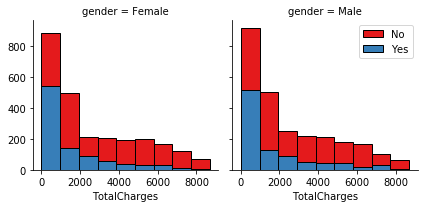

In [255]:
bins = np.linspace(df.TotalCharges.min(), df.TotalCharges.max(), 10)
g = sns.FacetGrid(df, col="gender", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'TotalCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

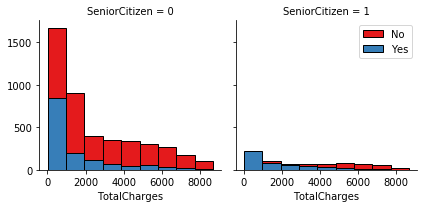

In [256]:
bins = np.linspace(df.TotalCharges.min(), df.TotalCharges.max(), 10)
g = sns.FacetGrid(df, col="SeniorCitizen", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'TotalCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

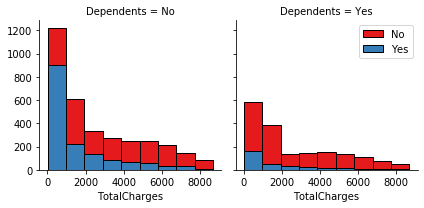

In [257]:
bins = np.linspace(df.TotalCharges.min(), df.TotalCharges.max(), 10)
g = sns.FacetGrid(df, col="Dependents", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'TotalCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

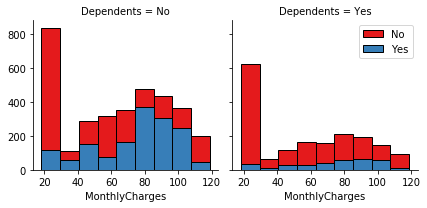

In [258]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="Dependents", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

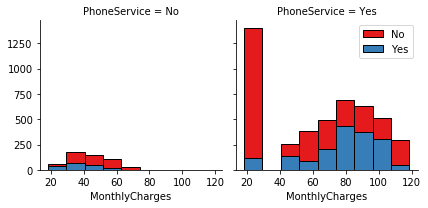

In [259]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="PhoneService", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

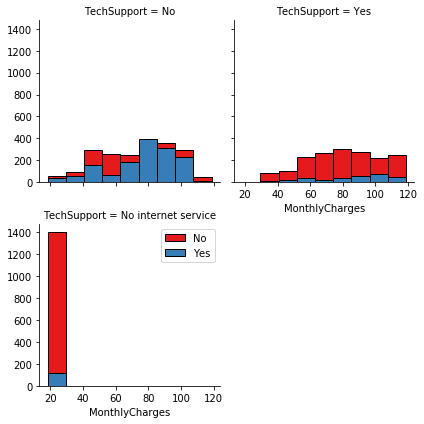

In [260]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="TechSupport", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

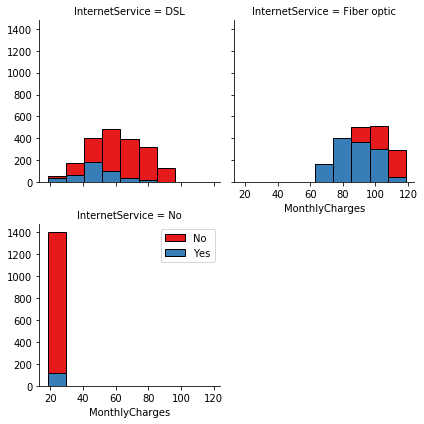

In [261]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="InternetService", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

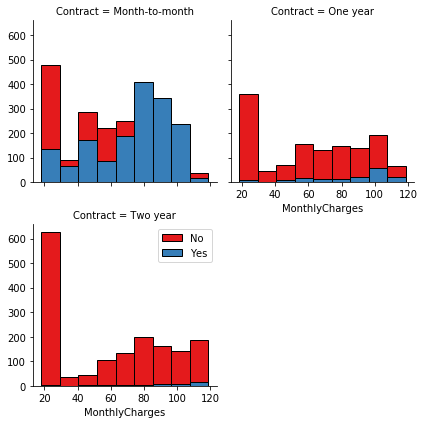

In [262]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="Contract", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

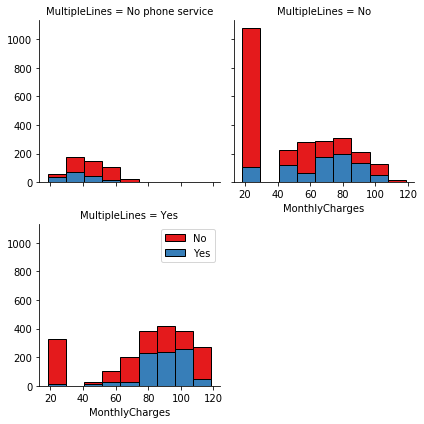

In [263]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="MultipleLines", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

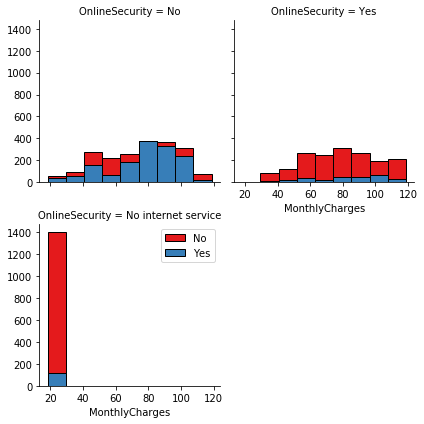

In [265]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="OnlineSecurity", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

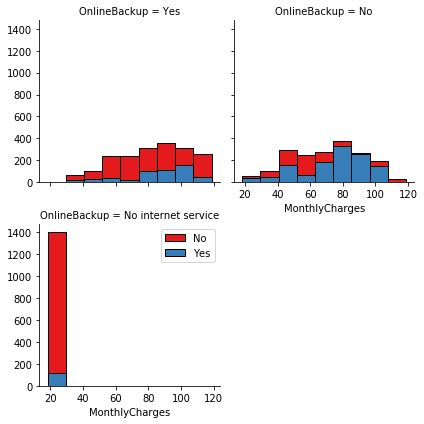

In [266]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="OnlineBackup", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

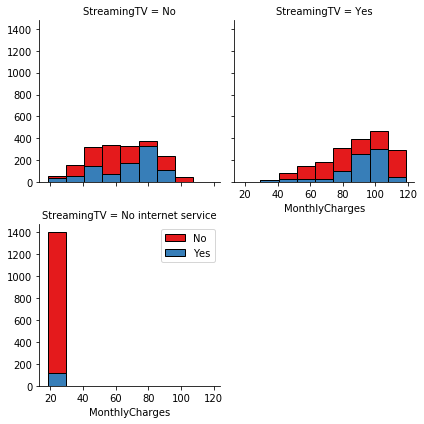

In [267]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="StreamingTV", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

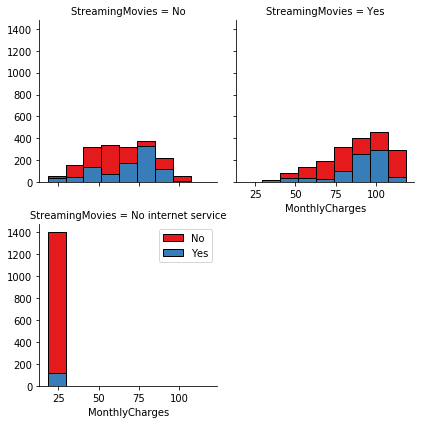

In [268]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="StreamingMovies", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

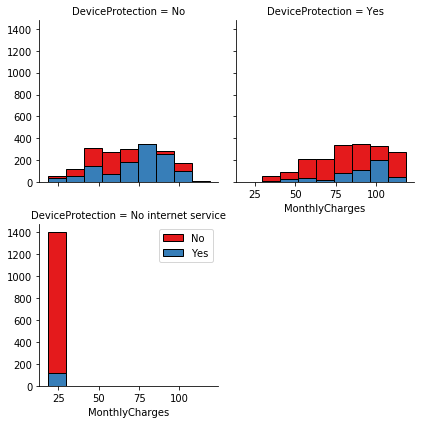

In [272]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="DeviceProtection", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

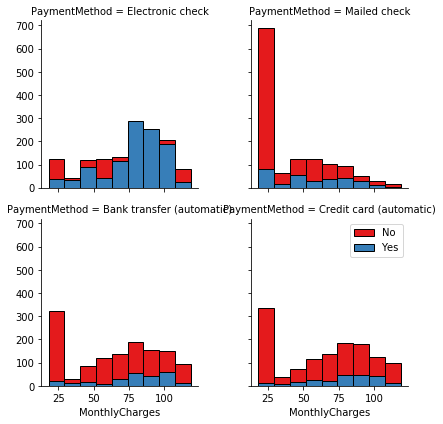

In [270]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="PaymentMethod", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

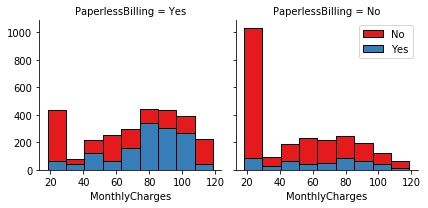

In [271]:
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="PaperlessBilling", hue="Churn", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [35]:
df32 = df[['gender','Partner','Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling']]
df32 = pd.concat([df['Churn'],pd.get_dummies(df)], axis=1)
df32.drop(['Churn'],axis=1,inplace=True)
df32.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [43]:
df33=df32.corr()
df33['Churn_Yes'].to_frame()

,Churn_Yes
SeniorCitizen,0.150541
tenure,-0.354049
MonthlyCharges,0.192858
TotalCharges,-0.199484
gender_Female,0.008545
gender_Male,-0.008545
Partner_No,0.149982
Partner_Yes,-0.149982
Dependents_No,0.163128
Dependents_Yes,-0.163128


In [61]:
grouped_test2=df[['Churn', 'MonthlyCharges']].groupby(['Churn'])
grouped_test2.head(2)

,Churn,MonthlyCharges
0,No,29.85
1,No,56.95
2,Yes,53.85
4,Yes,70.70


In [63]:
from scipy import stats
f_val, p_val = stats.f_oneway(grouped_test2.get_group('No')['MonthlyCharges'], grouped_test2.get_group('Yes')['MonthlyCharges'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 271.5769897682043 , P = 6.760843117999019e-60


### Significant Variables to be considered for LR Model

#### Total Charges
#### SeniorCitizen
#### Tenure
#### Partner
#### Tech Support
#### InternetService
#### Contract
#### MultipleLines
#### OnlineSecurity
#### OnlineBackup
#### StreamingMovies
#### DeviceProtection
#### PaymentMethod
#### PaperlessBilling
#### Dependent

In [129]:
df55=df[['Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling','TotalCharges','SeniorCitizen','tenure','Contract','MultipleLines','PaymentMethod']]
df55

,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,PaperlessBilling,TotalCharges,SeniorCitizen,tenure,Contract,MultipleLines,PaymentMethod
0,Yes,No,DSL,No,Yes,No,No,No,Yes,29.85,0,1,Month-to-month,No phone service,Electronic check
1,No,No,DSL,Yes,No,Yes,No,No,No,1889.50,0,34,One year,No,Mailed check
2,No,No,DSL,Yes,Yes,No,No,No,Yes,108.15,0,2,Month-to-month,No,Mailed check
3,No,No,DSL,Yes,No,Yes,Yes,No,No,1840.75,0,45,One year,No phone service,Bank transfer (automatic)
4,No,No,Fiber optic,No,No,No,No,No,Yes,151.65,0,2,Month-to-month,No,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,1990.50,0,24,One year,Yes,Mailed check
7039,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,7362.90,0,72,One year,Yes,Credit card (automatic)
7040,Yes,Yes,DSL,Yes,No,No,No,No,Yes,346.45,0,11,Month-to-month,No phone service,Electronic check
7041,Yes,No,Fiber optic,No,No,No,No,No,Yes,306.60,1,4,Month-to-month,Yes,Mailed check


## Logistic Regression Model

In [127]:
Feature = df[['Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling']]
Feature = pd.concat([Feature,pd.get_dummies(df55)], axis=1)
Feature.drop(['Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','PaperlessBilling'], axis = 1, inplace = True)
Feature.head()

,TotalCharges,SeniorCitizen,tenure,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,0,1,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1889.50,0,34,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,108.15,0,2,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1840.75,0,45,1,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4,151.65,0,2,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [130]:
Feature.columns

Index(['TotalCharges', 'SeniorCitizen', 'tenure', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check

In [132]:
X = Feature
X[0:5]

,TotalCharges,SeniorCitizen,tenure,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,0,1,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1889.50,0,34,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,108.15,0,2,1,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,1840.75,0,45,1,0,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4,151.65,0,2,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [133]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.99419409, -0.44032709, -1.28024804, -1.03561683,  1.03561683,
         0.65230493, -0.65230493,  1.38224311, -0.88689648, -0.52513044,
         1.00541855, -0.52513044, -0.63374636, -0.88459567, -0.52513044,
         1.37833008,  1.12817819, -0.52513044, -0.72391796,  1.01259351,
        -0.52513044, -0.63926039,  1.23636032, -0.52513044, -0.79684918,
        -0.82893915,  0.82893915,  0.9026127 , -0.51453688, -0.56136439,
        -0.96341068,  3.05633383, -0.85433559, -0.52997577, -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.17373982, -0.44032709,  0.06430269,  0.9656081 , -0.9656081 ,
         0.65230493, -0.65230493,  1.38224311, -0.88689648, -0.52513044,
        -0.99461065, -0.52513044,  1.57791834,  1.13045997, -0.52513044,
        -0.72551562, -0.8863848 , -0.52513044,  1.38137199,  1.01259351,
        -0.52513044, -0.63926039,  1.23636032, -0.52513044, -0.79684918,
         1.20636117, -1.20636117, -1.1078949 ,  1.94349528, -0.56136439,
         1.03797

## Normalise Data

In [135]:
X1= preprocessing.StandardScaler().fit(X).transform(X)
X1[0:5]

array([[-0.99419409, -0.44032709, -1.28024804, -1.03561683,  1.03561683,
         0.65230493, -0.65230493,  1.38224311, -0.88689648, -0.52513044,
         1.00541855, -0.52513044, -0.63374636, -0.88459567, -0.52513044,
         1.37833008,  1.12817819, -0.52513044, -0.72391796,  1.01259351,
        -0.52513044, -0.63926039,  1.23636032, -0.52513044, -0.79684918,
        -0.82893915,  0.82893915,  0.9026127 , -0.51453688, -0.56136439,
        -0.96341068,  3.05633383, -0.85433559, -0.52997577, -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.17373982, -0.44032709,  0.06430269,  0.9656081 , -0.9656081 ,
         0.65230493, -0.65230493,  1.38224311, -0.88689648, -0.52513044,
        -0.99461065, -0.52513044,  1.57791834,  1.13045997, -0.52513044,
        -0.72551562, -0.8863848 , -0.52513044,  1.38137199,  1.01259351,
        -0.52513044, -0.63926039,  1.23636032, -0.52513044, -0.79684918,
         1.20636117, -1.20636117, -1.1078949 ,  1.94349528, -0.56136439,
         1.03797

In [136]:
y = df['Churn'].values
y[0:5]

array(['No', 'No', 'Yes', 'No', 'Yes'], dtype=object)

In [137]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X1, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5625, 37) (5625,)
Test set: (1407, 37) (1407,)


In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
# predict
yhat = LR.predict(X_test)
yhat

array(['No', 'No', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

In [140]:
yhat_prob = LR.predict_proba(X_test)

In [141]:
# LogLoss # F1 #Jaccard
from sklearn.metrics import log_loss
print("LogLoss: "+"{:.2%}".format(metrics.log_loss(y_test, yhat_prob)))
from sklearn.metrics import f1_score
print("F1 score: "+"{:.2%}".format(metrics.f1_score(y_test, yhat, average='weighted') ))
from sklearn.metrics import jaccard_similarity_score
print("Jaccard score: "+"{:.2%}".format(metrics.jaccard_similarity_score(y_test, yhat)))

LogLoss: 41.99%
F1 score: 79.79%
Jaccard score: 80.24%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [142]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test,yhat))

Accuracy score:  0.8024164889836531


In [143]:
confusion_matrix(y_test,yhat)

array([[917, 115],
       [163, 212]], dtype=int64)

In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1032
         Yes       0.65      0.57      0.60       375

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

